In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from statistics import mean, stdev
from sklearn import preprocessing
from xgboost import XGBClassifier

In [2]:
#Ignoring future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load dataset
data = pd.read_csv("brain_stroke.csv")
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Check For Missing Values

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Check Data Types of All Attributes

In [7]:
# Check data types of each column
print(data.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [8]:
# Rename and clean all column titles
data.columns = data.columns.str.replace('_', ' ').str.title().str.replace(' ', '')
data.head()

,Gender,Age,Hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,Bmi,SmokingStatus,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
# Encoding categorical variables
label_cols = ['Gender', 'EverMarried', 'WorkType', 'ResidenceType', 'SmokingStatus']
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [10]:
data

,Gender,Age,Hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,Bmi,SmokingStatus,Stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [11]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
min_values = data[numerical_cols].min()
max_values = data[numerical_cols].max()

# Calculate the range
range_values = max_values - min_values

# Combine results into a DataFrame for better visualization
range_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Range': range_values
})

print(range_df)

                   Min     Max   Range
Age               0.08   82.00   81.92
Hypertension      0.00    1.00    1.00
HeartDisease      0.00    1.00    1.00
AvgGlucoseLevel  55.12  271.74  216.62
Bmi              14.00   48.90   34.90
Stroke            0.00    1.00    1.00


In [12]:
# Feature Scaling (for continuous variables)
scaler = StandardScaler()
data[['Age', 'AvgGlucoseLevel', 'Bmi']] = scaler.fit_transform(data[['Age', 'AvgGlucoseLevel', 'Bmi']])

Descriptive statistics for numerical features:
                Age  Hypertension  HeartDisease  AvgGlucoseLevel  \
count  4.981000e+03   4981.000000   4981.000000     4.981000e+03   
mean   2.853012e-18      0.096165      0.055210     1.169735e-16   
std    1.000100e+00      0.294848      0.228412     1.000100e+00   
min   -1.912575e+00      0.000000      0.000000    -1.127637e+00   
25%   -8.128627e-01      0.000000      0.000000    -6.370761e-01   
50%    6.973111e-02      0.000000      0.000000    -3.126979e-01   
75%    7.758062e-01      0.000000      0.000000     1.756443e-01   
max    1.702530e+00      1.000000      1.000000     3.678574e+00   

                Bmi       Stroke  
count  4.981000e+03  4981.000000  
mean  -6.219567e-16     0.049789  
std    1.000100e+00     0.217531  
min   -2.135293e+00     0.000000  
25%   -7.066756e-01     0.000000  
50%   -5.864298e-02     0.000000  
75%    6.041176e-01     0.000000  
max    3.004784e+00     1.000000  


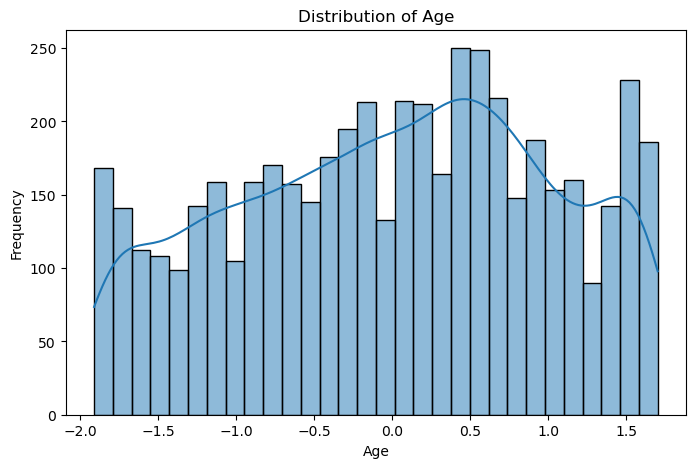

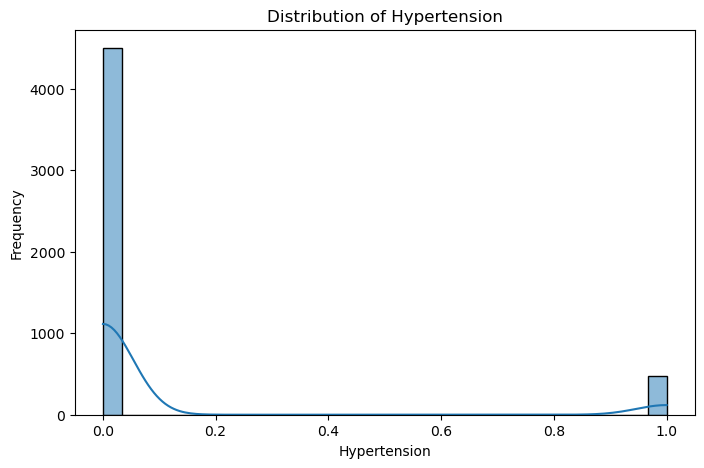

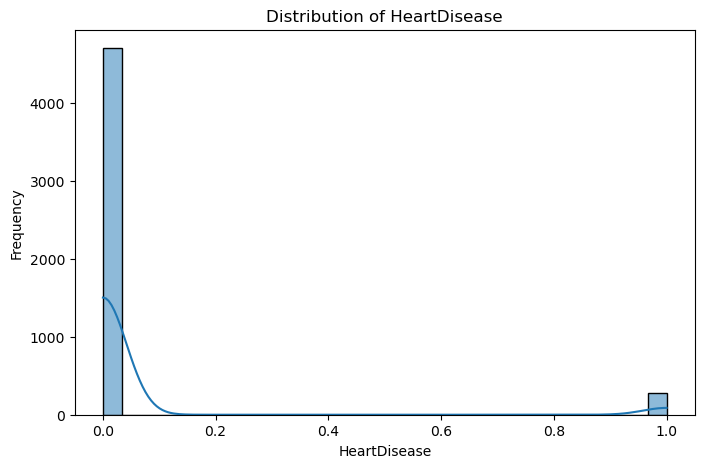

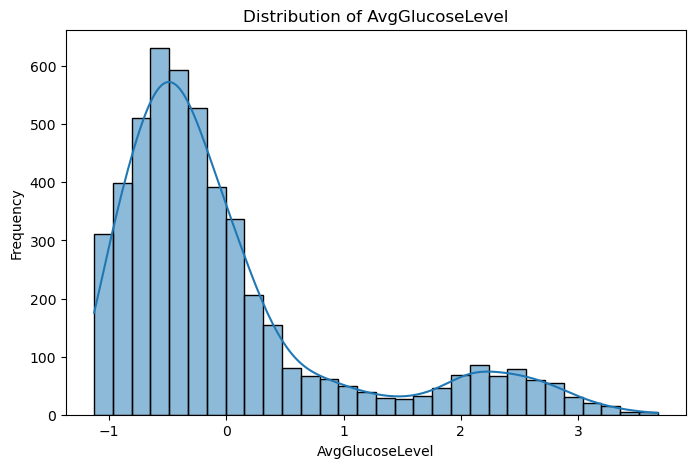

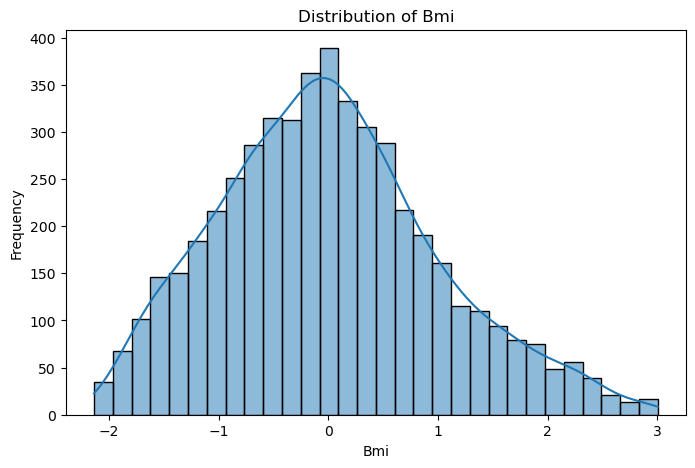

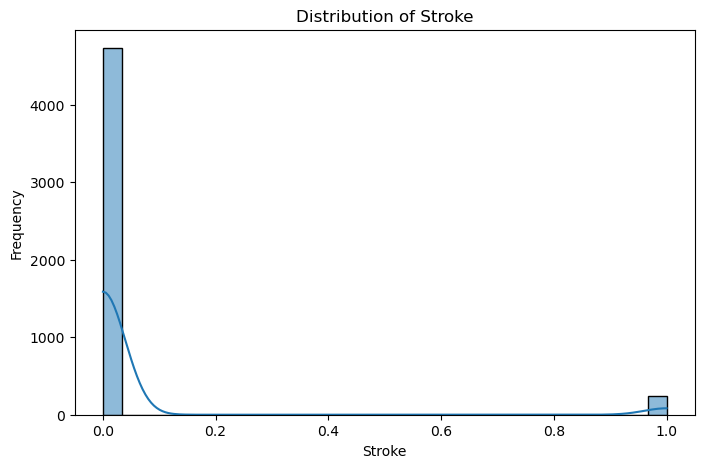

In [13]:
# Descriptive statistics for numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Descriptive statistics for numerical features:")
print(data[numerical_cols].describe())

# Visualizing distributions of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

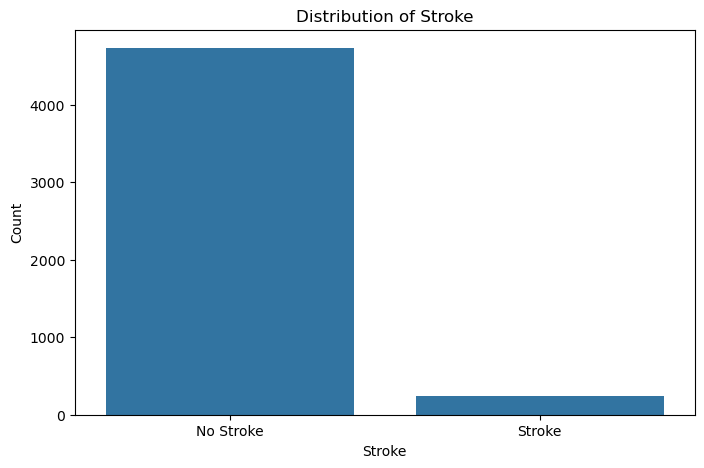

In [14]:
# Check for imbalance in the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Stroke', data=data)
plt.title("Distribution of Stroke")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

In [15]:
# Dropping stroke
X = data.drop('Stroke', axis=1)
y = data['Stroke']

In [16]:
X

,Gender,Age,Hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,Bmi,SmokingStatus
0,1,1.040584,0,1,1,1,1,2.723411,1.193238,1
1,1,1.614270,0,1,1,1,0,-0.000523,0.589390,2
2,0,0.246250,0,0,1,1,1,1.448529,0.869222,3
3,0,1.570141,1,0,1,2,0,1.512650,-0.662492,2
4,1,1.658400,0,0,1,1,1,1.780895,0.073909,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,-0.106788,0,0,0,1,0,-0.794162,0.191733,1
4977,1,-0.150917,0,0,1,1,1,1.890500,0.383197,3
4978,0,0.069731,1,0,1,0,0,-0.242364,0.486294,3
4979,1,-0.150917,0,0,1,1,0,-0.488199,0.221189,3


**Logistic Regression With Stratified Cross Validation**

In [18]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
lr = LogisticRegression()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    lr.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(lr.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9498997995991983, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9518072289156626, 0.9518072289156626]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.97991967871486 %

Overall Accuracy: 95.02108634940564 %

Standard Deviation is: 0.0008419430046900221


**K Nearest Neighbor Classifier With Stratified Cross Validation**

In [20]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
kc = KNeighborsClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    kc.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(kc.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9438877755511023, 0.9457831325301205, 0.9477911646586346, 0.9497991967871486, 0.9497991967871486, 0.9457831325301205, 0.9518072289156626, 0.9497991967871486, 0.9437751004016064, 0.9457831325301205]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.37751004016064 %

Overall Accuracy: 94.74008257478813 %

Standard Deviation is: 0.002792121938604873


**Random Forest Classifier With Stratified Cross Validation**

In [22]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
Rc = RandomForestClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    Rc.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(Rc.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9498997995991983, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9477911646586346, 0.9477911646586346, 0.9518072289156626, 0.9437751004016064]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.37751004016064 %

Overall Accuracy: 94.9006044216948 %

Standard Deviation is: 0.0021629590657083653


**Gradient Boosting Classifier With Stratified Cross Validation**

In [24]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
Gc = GradientBoostingClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    Gc.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(Gc.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9478957915831663, 0.9457831325301205, 0.9477911646586346, 0.9457831325301205, 0.9518072289156626, 0.9457831325301205, 0.9477911646586346, 0.9457831325301205, 0.9497991967871486, 0.9437751004016064]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.37751004016064 %

Overall Accuracy: 94.71992177125334 %

Standard Deviation is: 0.0023315575219209302


**Decision Tree Classifier With Stratified Cross Validation**

In [26]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
DT = DecisionTreeClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    DT.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(DT.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9038076152304609, 0.8955823293172691, 0.9216867469879518, 0.9036144578313253, 0.891566265060241, 0.9096385542168675, 0.9096385542168675, 0.9076305220883534, 0.9156626506024096, 0.8995983935742972]

Maximum Accuracy That can be obtained from this model is: 92.16867469879519 %

Minimum Accuracy: 89.1566265060241 %

Overall Accuracy: 90.58426089126044 %

Standard Deviation is: 0.009047211836029965


**XGBoost With Stratified Cross Validation**

In [28]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Turning off warning
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Create Classifier Object
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=1)

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    xgb.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(xgb.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9398797595190381, 0.9377510040160643, 0.9377510040160643, 0.9417670682730924, 0.9377510040160643, 0.9377510040160643, 0.9457831325301205, 0.9397590361445783, 0.9397590361445783, 0.9357429718875502]

Maximum Accuracy That can be obtained from this model is: 94.57831325301204 %

Minimum Accuracy: 93.57429718875501 %

Overall Accuracy: 93.93695020563216 %

Standard Deviation is: 0.0028102329005618995


In [29]:
# KNN Grid search
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
# Load a sample dataset (Brain Stroke dataset in this case)
X = data.drop(columns='Stroke')
y = data['Stroke']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a KNN classifier
knn = KNeighborsClassifier()
# Set the parameters for grid search
param_grid = {
    'n_neighbors': np.arange(1, 31),   # Number of neighbors
    'weights': ['uniform', 'distance'], # Weighting function
    'leaf_size': [10, 50, 100, 500]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)
# Make predictions with the best estimator
y_pred = best_estimator.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

grid_tuned_model = KNeighborsClassifier()
grid_clf = GridSearchCV(grid_tuned_model, param_grid, verbose=3)
grid_clf.fit(X_train, y_train)

Best Parameters: {'leaf_size': 10, 'n_neighbors': 8, 'weights': 'uniform'}
Accuracy: 0.9418254764292878
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.922 total time=   0.0s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.907 total time=   0.0s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.926 total time=   0.0s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 1/5] END leaf_size=10,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 50, 100, 500],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [30]:
# DecisionTreeClassifier Grid search
# Load a sample dataset (Brain Stroke dataset in this case)
X = data.drop(columns='Stroke')
y = data['Stroke']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a KNN classifier
dtc = DecisionTreeClassifier()
# Set the parameters for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'class_weight': [None, 'balanced'],       # Weights associated with classes
    'criterion': ['gini', 'entropy']          # Function to measure the quality of a split
}
# Initialize GridSearchCV
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)
# Make predictions with the best estimator
y_pred = best_estimator.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

grid_tuned_model = DecisionTreeClassifier()
grid_clf = GridSearchCV(grid_tuned_model, param_grid, verbose=3)
grid_clf.fit(X_train, y_train)

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.9458375125376128
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.898 total time=   0.0s
[CV 2/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.917 total time=   0.0s
[CV 3/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.910 total time=   0.0s
[CV 4/5] END class_

C:\Users\micah\school\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\micah\school\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\micah\school\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 5/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.918 total time=   0.0s
[CV 1/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5;, score=0.925 total time=   0.0s
[CV 2/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5;, score=0.932 total time=   0.0s
[CV 3/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5;, score=0.926 total time=   0.0s
[CV 4/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5;, score=0.920 total time=   0.0s
[CV 5/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5;, score=0.915 total time=   0.0s
[CV 1/5] END class_weight=None, criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10;, score=0.927 total time=   0.0s
[CV 2/5] END class_weight=None, criterio

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [31]:
# RandomForest Grid search
# Load a sample dataset (Brain Stroke dataset in this case)
X = data.drop(columns='Stroke')
y = data['Stroke']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a KNN classifier
rfc = RandomForestClassifier()
# Set the parameters for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)
# Make predictions with the best estimator
y_pred = best_estimator.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

grid_tuned_model = RandomForestClassifier()
grid_clf = GridSearchCV(grid_tuned_model, param_grid, verbose=3)
grid_clf.fit(X_train, y_train)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9448345035105316
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.947 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.951 total time=   0.2s
[CV 4/5] END criterion=g

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=3)

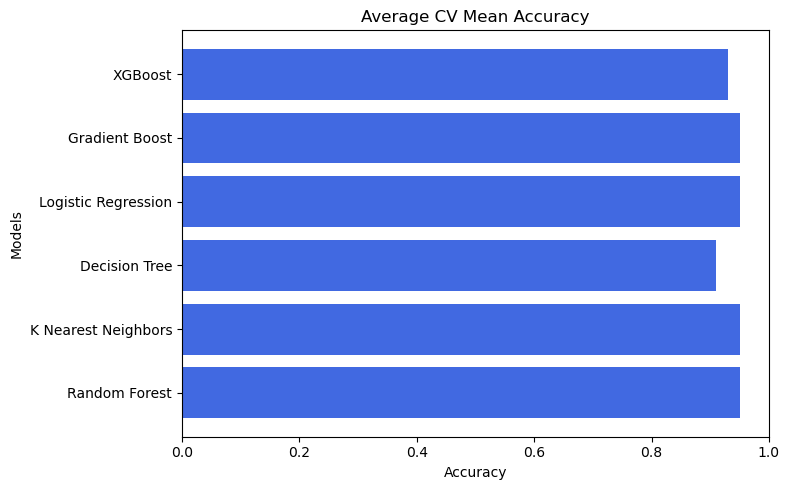

In [32]:
import matplotlib.pyplot as plt

# Define the data
models = ['Random Forest', 'K Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Gradient Boost', 'XGBoost']
accuracy = [0.95, 0.95, 0.91, 0.95, 0.95, 0.93]

plt.figure(figsize=(8, 5))
plt.barh(models, accuracy, color='royalblue')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Average CV Mean Accuracy')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

Analysis: 
The models that were used, like Random Forest, K Nearest Neighbors, Logistic Regression, and Gradient Boost, all got a high accuracy of 0.95. The Decision Tree was still good but a little lower, at 0.91.

Why Some Models Performed Better:
Random Forest: This model combines many decision trees, so it reduces overfitting and gives better results. It can handle more complex data, which is why it did so well here.

K Nearest Neighbors (KNN): KNN also worked well, which could mean the data is easy to classify. It might not have complicated patterns, so KNN could classify it without much trouble.

Logistic Regression: Even though it is a simple model, it still performed great. This might be because the data is mostly linearly separable, making it easy for Logistic Regression to classify the strokes.

Gradient Boost: Similar to Random Forest, it creates models step by step to fix errors from before. Its high accuracy shows it learned well from the mistakes of other models and made stronger predictions

Decision Tree: Decision Trees are good at explaining the results but sometimes overfit, which might be why it did not do as well as the others.

XGBoost: XGBoost worked well, but not as good as other models. This is likely due to the effective handling of data features, robust training methods, and the algorithm’s capability to capture complex patterns.

Conclusion:
The four models that performed the best likely show that the dataset is good and the features are strong. Random Forest and Gradient Boost might be more reliable in the long run because they are less likely to overfit. All models, except for Decision Tree, performed very similarly, meaning the data might not need very complex models to classify it well.